<a href="https://colab.research.google.com/github/alaks1377/Orthopedic/blob/main/Orthopedic_Prediction_KNN_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section I : Accessing the Data

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

Make a pandas DataFrame from the CSV

In [ ]:
data = pd.read_csv('/content/ortho_knnnb.csv')

How many variables does the dataset contain?

In [ ]:
data.shape

(310, 7)

What is the data about?

In [ ]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


What are we trying to predict here?

we are trying to predict instances of orthopedic parameters that they are Normal or Abnormal

In [ ]:
data['class']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

#Section II : Exploratory Data Analysis

Perform some descriptive statistics and make a note of your findings

In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Plot appropriate graphs to understand the relation between the variables.

In [ ]:
corr=data.corr()


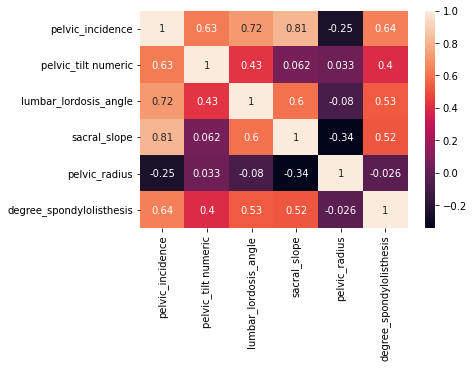

In [ ]:
sns.heatmap(corr,annot=True)

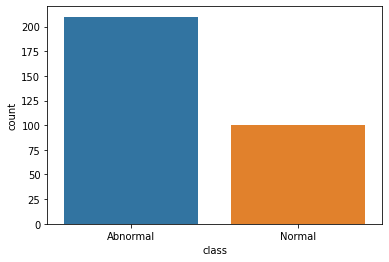

In [ ]:
sns.countplot(data['class'])

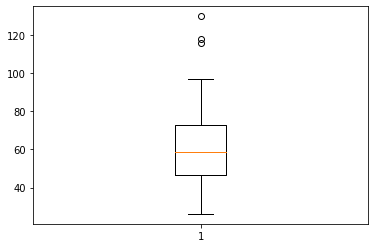

In [ ]:
plt.boxplot(data['pelvic_incidence'])
plt.show()

#Section III : Prepare data for Training!

Make a new column symptom_class with the abnormal rows as 1 and the normal rows as 0, drop the class column

In [ ]:
cls_val = data.columns[data.dtypes == 'object']
data = pd.get_dummies(data, columns = cls_val) 
data.rename(columns={'class_Abnormal':'symptom_class'},inplace = True)
data.drop('class_Normal', axis = 1, inplace = True)

In [ ]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


Split the entire dataset into independent features and symptoms as the response variable

In [ ]:
x = data.drop(['symptom_class'],axis=1)
y = data['symptom_class']

Normalize the variables.

In [ ]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
X1 = mms.fit_transform(x)

In [ ]:
x2 = pd.DataFrame(X1)
x2.columns = x.columns
x2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [ ]:
from  imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x2,y)

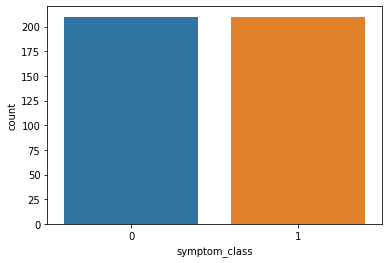

In [ ]:
sns.countplot(y_sm)

#Section IV : Training with KNN

Use train_test_split from sklearn and split the parameters and classes into train and test sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2)

Starting with three nearest neighbours , train your KNN model and make a note of accuracy and other diagnostics for both training and test sets.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred= knn.predict(x_test)


In [ ]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
accuracy_score(pred,y_test)

0.8928571428571429

Try with increasing the k value and check if there is any improvement in model performance. Use different value to arrive at the optimal value of k.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred= knn.predict(x_test)


In [ ]:
accuracy_score(pred,y_test)

0.8928571428571429

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#Section V : Training with Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model_pred = model.predict(x_test)

In [ ]:
model_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
model.score(x_test,y_test)

0.8333333333333334

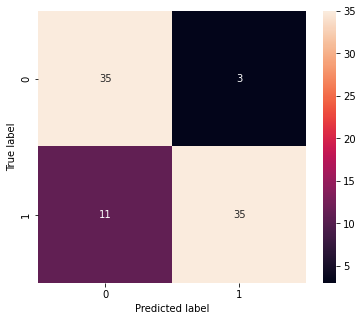

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,model_pred)

plt.figure(figsize = (6,5))
sns.heatmap(cm, annot = True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()